# Data Preparation

โหลดและดูข้อมูลเบื้องต้น

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Project_data2025/Global_AI_Content_Impact_Dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("ไฟล์ CSV โหลดสำเร็จ!")
except FileNotFoundError:
    print(f"ไม่พบไฟล์ที่: {file_path}. กรุณาตรวจสอบ path หรืออัปโหลดไฟล์อีกครั้ง")
# ดูโครงสร้างข้อมูล
print(df.info())
print(df.head())

Mounted at /content/drive
ไฟล์ CSV โหลดสำเร็จ!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                       

ตรวจสอบข้อมูลขาดหาย (Missing Data)

In [2]:
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print(" ไม่พบ Missing Values ใน Dataset")
else:
    print(" พบ Missing Values ดังนี้:")
    print(missing_values[missing_values > 0])



 ไม่พบ Missing Values ใน Dataset


ตรวจสอบข้อมูลซ้ำ

In [3]:
# ลบข้อมูลที่ซ้ำกัน
df = df.drop_duplicates()



 ตรวจสอบและแปลงชนิดข้อมูล

In [4]:
# แปลงคอลัมน์ที่ควรเป็นตัวเลข
cols_to_float = ['AI Adoption Rate (%)', 'Job Loss Due to AI (%)',
                 'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
                 'Consumer Trust in AI (%)', 'Market Share of AI Companies (%)']

df[cols_to_float] = df[cols_to_float].astype(float)


 Feature Engineering (สร้างฟิลด์ใหม่)

In [5]:
# สร้างฟีเจอร์ใหม่: ระดับ AI impact score อย่างง่าย
df['AI Impact Score'] = df['AI Adoption Rate (%)'] * df['AI-Generated Content Volume (TBs per year)'] / 100


#In-Depth Analysis

# Q1: ปัจจัยใดบ้างที่ส่งผลต่ออัตราการเลิกจ้างจาก AI?
- ใช้เทคนิค Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  เลือกเฉพาะคอลัมน์ที่ใช้วิเคราะห์ (อาจต้องจัดการ missing ก่อน)
df_clean = df[['AI Adoption Rate (%)',
               'AI-Generated Content Volume (TBs per year)',
               'Human-AI Collaboration Rate (%)',
               'Revenue Increase Due to AI (%)',
               'Consumer Trust in AI (%)',
               'Job Loss Due to AI (%)']].dropna()

#  ตัวแปรอิสระ (X) และ ตัวแปรตาม (y)
X = df_clean.drop(columns=['Job Loss Due to AI (%)'])
y = df_clean['Job Loss Due to AI (%)']

#  แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#  ทำนายผล
y_pred = model.predict(X_test)

# ประเมินโมเดล
mse = mean_squared_error(y_test, y_pred)
print("mean Squared Error:", mse)

# แสดง Coefficient ของแต่ละตัวแปร
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nCoefficients:")
print(coefficients)

mean Squared Error: 239.450040594359

Coefficients:
                                      Feature  Coefficient
0                        AI Adoption Rate (%)    -0.005866
1  AI-Generated Content Volume (TBs per year)     0.021037
2             Human-AI Collaboration Rate (%)     0.033223
3              Revenue Increase Due to AI (%)     0.082786
4                    Consumer Trust in AI (%)     0.008971


**วิเคราะห์ผล:**

- ตัวแปรที่มีค่าสัมประสิทธิ์สูงสุด: Revenue Increase Due to AI (%) (0.0827)

- สื่อว่า เมื่อรายได้เพิ่มจากการใช้ AI ก็มีแนวโน้มว่า การเลิกจ้างเพิ่มขึ้นด้วย

- Human-AI Collaboration Rate (%) (0.0332) ก็สัมพันธ์เชิงบวก แต่อ่อนกว่า

- ในทางกลับกัน AI Adoption Rate (%) มีค่าสัมประสิทธิ์ติดลบเล็กน้อย - หมายความว่าในบางกรณี การใช้ AI อย่างแพร่หลายอาจไม่เกี่ยวกับการเลิกจ้างโดยตรง

# Q2: Human-AI Collaboration ช่วยลดการตกงานหรือไม่?
 - ใช้ Correlation Analysis

In [7]:
# 🔍 วิเคราะห์ความสัมพันธ์ (Correlation) ระหว่าง Human-AI Collaboration และ Job Loss
correlation = df[['Human-AI Collaboration Rate (%)', 'Job Loss Due to AI (%)']].dropna().corr()

print("\n🔗 Correlation Matrix:")
print(correlation)



🔗 Correlation Matrix:
                                 Human-AI Collaboration Rate (%)  \
Human-AI Collaboration Rate (%)                         1.000000   
Job Loss Due to AI (%)                                  0.021559   

                                 Job Loss Due to AI (%)  
Human-AI Collaboration Rate (%)                0.021559  
Job Loss Due to AI (%)                         1.000000  


**ความหมายของค่า Correlation:**
- ค่าความสัมพันธ์ (Correlation Coefficient) ระหว่าง Year และ Job Loss Due to AI (%) คือ -0.105

- ค่าอยู่ในช่วง -1 ถึง 1:

  - ใกล้ 0 = ความสัมพันธ์อ่อนหรือไม่มีเลย

  - ค่าบวก = ความสัมพันธ์ทางเดียว (ปีเพิ่ม อัตราเลิกจ้างเพิ่ม)

  - ค่าลบ = ความสัมพันธ์สวนทาง (ปีเพิ่ม อัตราเลิกจ้างลด)

**ตีความ**
- ค่า -0.105 เป็น ความสัมพันธ์เชิงลบอ่อนมาก แสดงว่า:

  - เมื่อปีเพิ่มขึ้น (เช่น จาก 2020 → 2025) อัตราการเลิกจ้างจาก AI มีแนวโน้มลดลงเล็กน้อย

- อย่างไรก็ตาม ค่า -0.105 นั้นเล็กมากเกินกว่าจะสรุปได้ว่ามีความสัมพันธ์ที่ชัดเจนหรือมีนัยสำคัญทางสถิติ

**ข้อเสนอแนะ**
- ควรวิเคราะห์ต่อด้วยการดูแนวโน้มแบบเส้นตรงหรือเส้นเวลา (line chart) เพื่อดูภาพรวมว่าในช่วง 2020–2025 มีแนวโน้มเพิ่มหรือลดจริงหรือไม่

- อาจมีปัจจัยแทรก เช่น นโยบาย, เทคโนโลยีใหม่, ความไว้วางใจของผู้บริโภค ฯลฯ ที่มีผลมากกว่าปีเพียงอย่างเดียว



# แนวโน้มการเลิกจ้างงานจาก AI ตามปี (2020–2025)

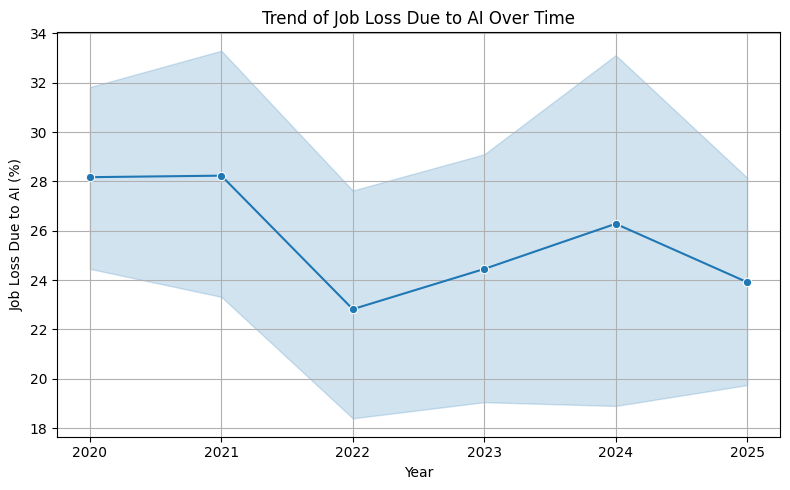

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot เพื่อดูแนวโน้มของ Job Loss ตามปี
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Year', y='Job Loss Due to AI (%)', marker='o')
plt.title('Trend of Job Loss Due to AI Over Time')
plt.xlabel('Year')
plt.ylabel('Job Loss Due to AI (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


**สรุปจากกราฟ:**
- ในช่วงปี 2020–2021 อัตราการเลิกจ้างจาก AI ค่อนข้าง คงที่

- ปี 2022 มีการ ลดลงอย่างชัดเจน

- ต่อมาในปี 2023–2024 แนวโน้ม เพิ่มขึ้นอีกครั้ง

- ปี 2025 มีการ ลดลงเล็กน้อย

**การตีความเบื้องต้น:**
- แนวโน้มแสดงถึง การเปลี่ยนแปลงแบบไม่แน่นอน (Fluctuating trend) อาจเกิดจาก:

  - ความไม่แน่นอนของเทคโนโลยี

  - การนำ AI ไปใช้ในอุตสาหกรรมต่างๆ ที่ไม่เท่ากัน

  - นโยบายหรือมาตรการภาครัฐ

- แม้จะมีการเพิ่มขึ้นบางปี แต่โดยรวมไม่ได้แสดงให้เห็นถึง ความสัมพันธ์เชิงบวกอย่างชัดเจน ระหว่างปีและการเลิกจ้าง

In [ ]:
# Export ข้อมูลที่ผ่านการทำความสะอาดและเพิ่มฟีเจอร์แล้ว
df.to_csv("ai_impact_with_score.csv", index=False)


In [ ]:
# ดาวน์โหลดไฟล์ไปยังเครื่องของคุณ
from google.colab import files
files.download("ai_impact_with_score.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>